Preparations: import model, manually input rg65

In [1]:
rg65 = ('cord', 'smile', 'rooster', 'voyage', 'noon', 'string', 'fruit', 'furnace', 'autograph', 'shore',
     'automobile', 'wizard', 'mound' ,'stove', 'grin', 'implement', 'asylum', 'fruit', 'asylum', 'monk',
     'graveyard', 'madhouse', 'glass', 'magician', 'boy', 'rooster', 'cushion','jewel', 'monk', 'slave',
     'asylum', 'cemetery', 'coast', 'forest', 'grin', 'lad', 'shore', 'woodland', 'monk', 'oracle',
     'boy', 'sage', 'automobile', 'cushion', 'mound', 'shore', 'lad', 'wizard', 'forest', 'graveyard',
     'food', 'rooster', 'cemetery', 'woodland', 'shore', 'voyage', 'bird', 'woodland', 'coast', 'hill',
     'furnace', 'implement', 'crane', 'rooster', 'hill', 'woodland', 'car', 'journey', 'cemetery', 'mound',
     'glass', 'jewel', 'magician', 'oracle', 'crane', 'implement', 'brother', 'lad', 'sage', 'wizard',
     'oracle', 'sage', 'bird', 'crane', 'bird', 'cock', 'food', 'fruit', 'brother', 'monk',
     'asylum', 'madhouse', 'furnace', 'stove', 'magician', 'wizard', 'hill', 'mound', 'cord', 'string',
     'glass', 'tumbler', 'grin', 'smile', 'serf', 'slave', 'journey', 'voyage', 'autograph', 'signature',
     'coast', 'shore', 'forest', 'woodland', 'implement', 'tool', 'cock', 'rooster', 'boy', 'lad',
     'cushion', 'pillow', 'cemetery', 'graveyard', 'automobile', 'car', 'midday', 'noon', 'gem', 'jewel')

In [23]:
# Dependencies
from gensim.models import KeyedVectors
from scipy.spatial import distance
import pickle
from scipy import stats
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Synchronic word embedding

In [3]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

Comparison of rg65 human similarities with Word2vec similarities

In [7]:
# Calculate cosine distance between each pair of word embeddings you have extracted
cos_dist = []
for i in range(0, 65):
    cos_dist.append(distance.cosine(model[rg65[i+i]], model[rg65[i+i+1]]))

0.23905426263809204

In [16]:
# report the Pearson correlation between word2vec-based and human similarities
human_similarity = (0.02, 0.04, 0.04, 0.05, 0.06, 0.11, 0.14, 0.18, 0.19, 0.39,
                    0.42, 0.44, 0.44, 0.45, 0.57, 0.79, 0.85, 0.88, 0.90, 0.91,
                    0.96, 0.97, 0.97, 0.99, 1.00, 1.09, 1.18, 1.22, 1.24, 1.26,
                    1.37, 1.41, 1.48, 1.55, 1.69, 1.78, 1.82, 2.37, 2.41, 2.46,
                    2.61, 2.63, 2.63, 2.69, 2.74, 3.04, 3.11, 3.21, 3.29, 3.41,
                    3.45, 3.46, 3.46, 3.58, 3.59, 3.60, 3.65, 3.66, 3.68, 3.82,
                    3.84, 3.88, 3.92, 3.94, 3.94)
stats.pearsonr(cos_dist, human_similarity)

(-0.7720616169177827, 5.091063082040406e-14)

Analogy test

In [4]:
# Function for analogy test
def analogical_reasoning(wa1, wa2, wb1):
    result = model.most_similar(positive=[wa2, wb1], negative=[wa1])
    most_similar_key, similarity = result[0]  # look at the first match
    return most_similar_key

In [6]:
def analogy_test_accuracy(file):
    correct, total = 0, 0
    with open(file) as f:
        for line in f:
            total += 1
            words = line.strip().split(" ")
            res = analogical_reasoning(words[0], words[1], words[2])
            if(res == words[3]):
                correct += 1
    return correct/float(total)

In [7]:
analogy_test_accuracy("tests\word-test-semantic.txt")

0.9

In [8]:
analogy_test_accuracy("tests\word-test-syntactic.txt")

0.6757028112449799

# Diachronic word embedding
Propose three different methods for measuring degree of semantic change for individual words.

In [43]:
diachronic = pickle.load(open("data.pkl", "rb"))
diachronic_vectors = diachronic['E']
nwords = len(diachronic['w'])

In [ ]:
# Cosine similarity
dia_cos = {}
for i,word in enumerate(diachronic['w']):
    dia_cos[word] = distance.cosine(diachronic_vectors[i][0], diachronic_vectors[i][9])
dia_cos_sorted = dict(sorted(dia_cos.items(), key=lambda item: -item[1]))
dia_cos_sorted

In [ ]:
# Pearson correlation
dia_pearson = {}
for i,word in enumerate(diachronic['w']):
    dia_pearson[word] = stats.pearsonr(diachronic_vectors[i][0], diachronic_vectors[i][9])[0]
dia_pearson_sorted = dict(sorted(dia_pearson.items(), key=lambda item: item[1]))
dia_pearson_sorted

In [ ]:
# kNN
space_1900 = np.array([diachronic_vectors[i][0] for i in range(0, len(diachronic['w']))])
knn_1900 = NearestNeighbors(n_neighbors=25, algorithm='brute', metric="cosine").fit(space_1900)
space_1990 = np.array([diachronic_vectors[i][9] for i in range(0, len(diachronic['w']))])
knn_1990 = NearestNeighbors(n_neighbors=25, algorithm='brute', metric="cosine").fit(space_1990)

knn_dist = {}
for i,w in enumerate(diachronic['w']):
    knn_1900_id = knn_1900.kneighbors(np.array([diachronic_vectors[i][0],]))[1][0].tolist()
    knn_1990_id = knn_1990.kneighbors(np.array([diachronic_vectors[i][9],]))[1][0].tolist()
    nbrs = set(knn_1900_id).union(set(knn_1990_id))
    second_sim_1900 = np.array([1-distance.cosine(diachronic_vectors[i][0], diachronic_vectors[j][0]) for j in nbrs])
    second_sim_1990 = np.array([1-distance.cosine(diachronic_vectors[i][9], diachronic_vectors[j][9]) for j in nbrs])
    knn_dist[w] = distance.cosine(second_sim_1900, second_sim_1990)

knn_dist_sorted = dict(sorted(knn_dist.items(), key=lambda item: -item[1]))
knn_dist_sorted

In [63]:
# top20 and least20
print("k-NN:")
print(list(knn_dist_sorted.keys())[:20])
print(list(knn_dist_sorted.keys())[-20:])
print("Cosine distance:")
print(list(dia_cos_sorted.keys())[:20])
print(list(dia_cos_sorted.keys())[-20:])
print("Pearson correlation:")
print(list(dia_pearson_sorted.keys())[:20])
print(list(dia_pearson_sorted.keys())[-20:])

k-NN:
['objectives', 'radio', 'approach', 'computer', 'sector', 'impact', 'film', 'signal', 'programs', 'assessment', 'mcgraw', 'skills', 'focus', 'ml', 'techniques', 'media', 'patterns', 'models', 'framework', 'goals']
['shore', 'evening', 'georgia', 'september', 'father', 'april', 'wife', 'autumn', 'night', 'ohio', 'june', 'mother', 'snow', 'january', 'iowa', 'summer', 'december', 'afternoon', 'coast', 'months']
Cosine distance:
['programs', 'objectives', 'computer', 'radio', 'sector', 'goals', 'approach', 'van', 'shri', 'media', 'impact', 'perspective', 'patterns', 'berkeley', 'shift', 'film', 'assessment', 'stanford', 'challenge', 'therapy']
['week', 'feet', 'september', 'god', 'december', 'daughter', 'months', 'century', 'january', 'increase', 'october', 'years', 'february', 'november', 'june', 'april', 'techniques', 'skills', 'mcgraw', 'ml']
Pearson correlation:
['programs', 'objectives', 'computer', 'approach', 'impact', 'signal', 'file', 'bar', 'drive', 'johnson', 'reserve', 'i

In [73]:
# Pearson correlation of the 3 metrics to detect semantic change
cos_original_order = []
pearson_original_order = []
knn_original_order = []
for i,w in enumerate(diachronic['w']):
    cos_original_order.append(dia_cos_sorted[w])
    pearson_original_order.append(dia_pearson_sorted[w])
    knn_original_order.append(knn_dist_sorted[w])
cos_original_order = np.array(cos_original_order)
pearson_original_order = np.nan_to_num(pearson_original_order)
knn_original_order = np.array(knn_original_order)
print("cos", "pearson", distance.cosine(cos_original_order, pearson_original_order))
print("cos", "knn", distance.cosine(cos_original_order, knn_original_order))
print("pearson", "knn", distance.cosine(pearson_original_order, knn_original_order))

cos pearson 0.05789368211206525
cos knn 0.20403821816250622
pearson knn 0.3465333141444966


In [79]:
# Reference dataset
import csv
changed_words = []
with open('tests/ChangedWords.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if row[1] in diachronic['w']:
            changed_words.append(row[1])
changed_words

['card', 'sleep', 'parent', 'address', 'king', 'cell']

In [123]:
# Precision@k
top_num = 200
metrics = [dia_cos_sorted, dia_pearson_sorted, knn_dist_sorted]
for metric in metrics:
    top = list(metric.keys())[:top_num]
    hit = 0
    for k, w in enumerate(changed_words):
        if w in top:
            hit += 1
        precision_at_k = hit / top_num
        print(k, precision_at_k)
    print("----------")

0 0.005
1 0.005
2 0.005
3 0.01
4 0.01
5 0.01
----------
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
----------
0 0.0
1 0.0
2 0.0
3 0.005
4 0.005
5 0.005
----------


In [150]:
# Change point detection
word = "computer"
word_id = -1
for i,w in enumerate(diachronic['w']):
    if w == word:
        word_id = i
        break
dists = []
for y in range(0, 9):
    dists.append(distance.cosine(diachronic_vectors[word_id][y], diachronic_vectors[word_id][y+1]))
",".join("{:.4}".format(float(d)) for d in dists)

'0.0,0.0,0.0,0.0,0.6495,0.3183,0.2461,0.249,0.2182'

In [151]:
# Get the first 2 dimensions to make 2D-arrays for visualization
verts = []
for y in range(0, 10):
    verts.append((diachronic_vectors[word_id][y][0], diachronic_vectors[word_id][y][1]))
verts

[(0.035970263514305205, 0.10399621332402481),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (-0.04230543169730695, 0.03431170534139141),
 (-0.09982404350730054, -0.07045332053539204),
 (-0.013464379551841385, -0.0498952510218078),
 (-0.0004912758785073442, -0.1028516091471856),
 (-0.034831764124726695, -0.15269380613166209),
 (-0.02693115350797087, -0.12838902258049323)]

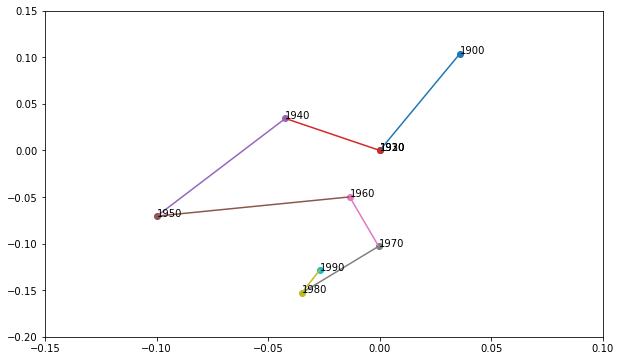

In [156]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.xlim(-0.15, 0.1)
plt.ylim(-0.2, 0.15)
for i in range(0, 10):
    plt.text(verts[i][0], verts[i][1], str(1900+i*10))
    plt.plot(verts[i][0], verts[i][1], 'o')
for i in range(0, 9):
    plt.plot((verts[i][0], verts[i+1][0]), (verts[i][1], verts[i+1][1]))
plt.show()